In [113]:
import matplotlib.pyplot as plt
import cv2
from numpy.fft import fft2, ifft2
from numpy import exp, pi

In [114]:
imbook = cv2.imread('./book2.png')
imbook = cv2.cvtColor(imbook, cv2.COLOR_BGR2GRAY)
# print(imbook.shape)

In [115]:
imbook.shape

(642, 488)

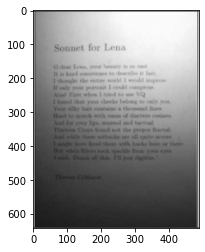

In [116]:
plt.imshow(imbook,cmap = "gray")

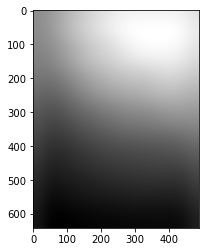

In [117]:
from scipy import ndimage as flt
fltbook = flt.gaussian_filter(imbook, sigma = 30)
plt.imshow(fltbook,cmap = "gray")

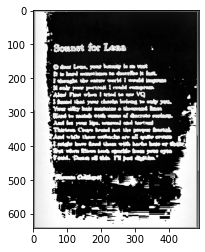

In [118]:
plt.imshow(imbook-fltbook, cmap='gray')

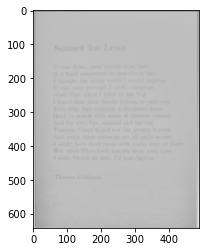

In [119]:
import numpy as np
res = np.log10(imbook) - np.log10(fltbook)
# print(np.array(res))
minres = np.min(res)
maxres = np.max(res)
res = (res-minres)*255/(maxres-minres)
res = res.astype(int)
# print(minres,maxres)
plt.imshow(res, cmap='gray')

# Task

Реализовать функцию flt.gaussian_filter только с использование numpy 


In [120]:
def my_gaussian_filter(img, sigma):
    cx, cy = img.shape[0]//2, img.shape[1]//2
    x1 = np.roll(np.arange(-cx, cx), cx)
    y1 = np.roll(np.arange(-cy, cy), cy)
    x, y = np.meshgrid(y1, x1)
    g = exp(-(x**2+y**2)/2/sigma**2)/(2*pi*sigma**2)
    r = np.real(ifft2(fft2(img)*fft2(g)))
    return r 

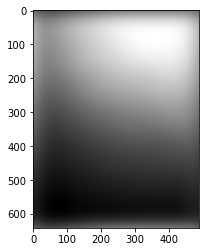

In [123]:
fltbook1 = my_gaussian_filter(imbook, sigma = 30)
plt.imshow(fltbook1,cmap = "gray")